<div style="text-align: right">Peter Norvig, 3 Oct 2015, revised 27 Oct 2015; 9 Feb 2016</div> 

# Probability, Paradox, and the Reasonable Person Principle

In this notebook, we cover the basics of probability theory, and show how to implement the theory in Python. (You should have a little background in [probability](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/pdf.html) and [Python](https://www.python.org/about/gettingstarted/).) Then we show how to solve a profusion of particularly perplexing paradoxical probability problems.

Over 200 years ago, [Pierre-Simon Laplace](https://en.wikipedia.org/wiki/Pierre-Simon_Laplace) [wrote](https://en.wikipedia.org/wiki/Classical_definition_of_probability):

>*The probability of an event is the ratio of the number of cases favorable to it, to the number of all cases possible, when [the cases are] equally possible. ... Probability is thus simply a fraction whose numerator is the number of favorable cases and whose denominator is the number of all the cases possible.*

Laplace really nailed it, way back then. If you want to untangle a probability problem, all you have to do is be methodical about defining exactly what the cases are, and then careful in counting the number of favorable and total cases. We'll start being methodical by defining terms:


- **[Experiment](https://en.wikipedia.org/wiki/Experiment_(probability_theory%29):**
  An occurrence with an uncertain outcome that we can observe.
  <br>*For example, rolling a die.*
- **[Outcome](https://en.wikipedia.org/wiki/Outcome_(probability%29):**
  The result of an experiment; one particular state of the world. What Laplace calls a "case."
  <br>*For example:* `6`.
- **[Sample Space](https://en.wikipedia.org/wiki/Sample_space):**
  The set of all possible outcomes for the experiment. 
  <br>*For example,* `{1, 2, 3, 4, 5, 6}`.
- **[Event](https://en.wikipedia.org/wiki/Event_(probability_theory%29):**
  A subset of possible outcomes that together have some property we are interested in.
  <br>*For example, the event "even die roll" is the set of outcomes* `{2, 4, 6}`. 
- **[Probability](https://en.wikipedia.org/wiki/Probability_theory):**
  The probability of an event is the expected proportion of times that an exxperiment would yield an outcome that is part of the event. Under the assumption that all outcomes in the sample space are equally likely, this is the number of possible outcomes in the event divided by the number in the sample space.
  <br>*For example, the probability of an even outcome from a six-sided die is*:
  <br>`|{2, 4, 6}| / |{1, 2, 3, 4, 5, 6}| = 3/6 = 1/2.`

# Code for `P` 

The traditional name is `P` for Probability:

In [1]:
from fractions import Fraction
from __future__ import division

def P(event, space): 
    "The probability of an event, given a sample space of equiprobable outcomes."
    return Fraction(len(event & space), len(space))

Read this as implementing Laplace's quote directly: *"Probability is thus simply a fraction whose numerator is the number of favorable cases [outcomes in the intersection of the sample space and the event] and whose denominator is the number of all the cases possible [the sample space]."* Note I use `Fraction` rather than regular division because I want exact answers like 1/3, not 0.3333333333333333.  

# Warm-up Problem: Die Roll

What's the probability of rolling an even number with a single six-sided fair die? 

We'll call the sample space `D`:

In [2]:
D = {1, 2, 3, 4, 5, 6}

The probability of the event of "*rolling an even number*" is:

In [3]:
even = {2, 4, 6}

P(even, D)

Fraction(1, 2)

# More Warm-Up Problems: Balls in Urns

Around 1700, [Jacob Bernoulli](https://en.wikipedia.org/wiki/Jacob_Bernoulli), wrote about drawing colored balls from an urn in his landmark treatise *[Ars Conjectandi](https://en.wikipedia.org/wiki/Ars_Conjectandi)*, and ever since then, explanations of probability have relied on [drawing balls from urns](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=probability%20ball%20urn). (You'd think the urns would be empty by now.) 

We might as well try a few of these problems.  For example, here are [four related problems](http://mathforum.org/library/drmath/view/69151.html) adapted from mathforum.org:

> An urn contains 23 balls: 8 white, 6 blue, and 9 red.  We select six balls at random (meaning, each possible selection is equally likely) from the urn. What is the probability of each of these possible outcomes:

> 1. all balls are red
2. 3 are blue, 2 are white, and 1 is red
3. 2 are blue and 4 are red
4. exactly 4 balls are white

So, an outcome is a set of 6 balls, and the sample space is the set of all possible 6 ball combinations. We'll solve each problem using our `P` function, and also using basic arithmetic; that is, *counting*. There are two aspects of these kinds of problems that make counting tricky:
- We have multiple balls of the same color. 
- An outcome is a set of balls, where order doesn't matter, but it is often easier to count with sequences of balls, where order does matter.

To account for the first aspect, I'll have 8 different white balls labelled `'W1'` through `'W8'`, rather than having eight balls all labelled `'W'`.  That makes it clear that selecting `'W1'` is different from selecting `'W2'`.

To account for the second aspect, I will sometimes first count the number of *permutations* of balls, then get the number of *combinations* by dividing the number of permutations by $c!$, where $c$ is the number of balls in a combination. For example, if I want to choose 2 white balls from the 8 available, there are 8 ways to choose a first white ball and 7 ways to choose a second, and therefore 8 &times; 7 = 56 permutations of two white balls. But there are only 56 / 2 = 28 combinations, because `(W1, W2)` is the same combination as `(W2, W1)`.

Let's solve the four problems. First, we'll define the contents of the urn:

In [4]:
def cross(A, B):
    "The set of all ways of concatenating one item from the iterable 'A' with one from 'B'."
    return {a + b 
            for a in A for b in B}

urn = cross('W', '12345678') | cross('B', '123456') | cross('R', '123456789') 

urn

{'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'R1',
 'R2',
 'R3',
 'R4',
 'R5',
 'R6',
 'R7',
 'R8',
 'R9',
 'W1',
 'W2',
 'W3',
 'W4',
 'W5',
 'W6',
 'W7',
 'W8'}

In [5]:
len(urn)

23

`U6` will be the sample space.  We use `itertools.combinations` to generate all combinations of 6 balls from the urn, and we then join each combination into a string:

In [6]:
import itertools

U6 = {' '.join(combo)
      for combo in itertools.combinations(urn, 6)}

len(U6)

100947

I don't want to print the whole sample space (since it is pretty big); let's just peek at a random sample of them:

In [7]:
import random

random.sample(U6, 10)

['W4 R7 W2 B2 W8 B6',
 'W4 B3 W2 W6 R3 R6',
 'W1 R9 R7 W2 W6 R3',
 'W1 R9 W2 W6 W7 B1',
 'R1 R9 W6 W8 B1 R6',
 'B4 W3 R7 B5 B2 R6',
 'R2 W3 B5 W6 W8 B6',
 'R8 R9 W2 W8 B6 B1',
 'R8 W4 W5 B5 R3 R6',
 'R8 R9 R2 W2 B2 W7']

Is 100,947 really the right number of ways of choosing 6 out of 23 items, or  "23 choose 6", as  mathematicians [call it](https://en.wikipedia.org/wiki/Combination)?  Well, we can choose any of 23 for the first item, any of 22 for the second, and so on down to 18 for the sixth. But we don't care about the ordering of the six items, so we divide the product by 6! (the number of permutations of 6 things) giving us:

$$23 ~\mbox{choose}~ 6 = \frac{23 \cdot 22 \cdot 21 \cdot 20 \cdot 19 \cdot 18}{6!} = 100947$$

Note that $23 \cdot 22 \cdot 21 \cdot 20 \cdot 19 \cdot 18 = 23! \;/\; 17!$, so, generalizing, we can write:

$$n ~\mbox{choose}~ c = \frac{n!}{(n - c)! \cdot c!}$$

And we can translate that to code and verify that 23 choose 6 is 100,947:

In [8]:
from math import factorial

def choose(n, c):
    "Number of ways to choose c items from a list of n items."
    return factorial(n) // (factorial(n - c) * factorial(c))

In [9]:
choose(23, 6)

100947

Now we're ready to answer the 4 problems: 

**Urn Problem 1:** what's the probability of selecting 6 red balls? 

In [10]:
red6 = {s for s in U6 if s.count('R') == 6}

P(red6, U6)

Fraction(4, 4807)

Let's investigate a bit more. How many ways of getting 6 red balls are there?

In [11]:
len(red6)

84

Why are there 84 ways?  Because there are 9 red balls in total, and we are asking how many ways we can choose 6 of them:

In [12]:
choose(9, 6)

84

So the probabilty of 6 red balls is then just 9 choose 6 divided by the size of the sample space:

In [13]:
P(red6, U6) == Fraction(choose(9, 6), 
                        len(U6))

True

**Urn Problem 2:** what is the probability of 3 blue, 2 white, and 1 red?

In [14]:
b3w2r1 = {s for s in U6 if
          s.count('B') == 3 and s.count('W') == 2 and s.count('R') == 1}

P(b3w2r1, U6)

Fraction(240, 4807)

We can get the same answer by counting how many ways we can choose 3 out of 6 blues, 2 out of 8 whites, and 1 out of 9 reds, and dividing by the number of possible selections:

In [15]:
P(b3w2r1, U6) == Fraction(choose(6, 3) * choose(8, 2) * choose(9, 1), 
                          len(U6))

True

Here we don't need to divide by any factorials, because `choose` has already accounted for that. 

We can get the same answer by figuring: "there are 6 ways to pick the first blue, 5 ways to pick the second blue, and 4 ways to pick the third; then 8 ways to pick the first white and 7 to pick the second; then 9 ways to pick a red. But the order `'B1, B2, B3'` should count as the same as `'B2, B3, B1'` and all the other orderings; so divide by 3! to account for the permutations of blues, by 2! to account for the permutations of whites, and by 100947 to get a probability:

In [16]:
 P(b3w2r1, U6) == Fraction((6 * 5 * 4) * (8 * 7) * 9, 
                           factorial(3) * factorial(2) * len(U6))

True

**Urn Problem 3:** What is the probability of 2 blue and 4 red balls? 

We can solve it the same three ways:

In [17]:
b2r4 = {s for s in U6 if
        s.count('B') == 2 and s.count('R') == 4}

P(b2r4, U6)

Fraction(90, 4807)

In [18]:
P(b2r4, U6) == Fraction(choose(6, 2) * choose(9, 4),  
                        len(U6))

True

In [19]:
P(b2r4, U6) == Fraction((6 * 5) * (9 * 8 * 7 * 6), 
                        factorial(2) * factorial(4) * len(U6))

True

**Urn Problem 4:** What is the probability of exactly 4 white balls?

We can interpret this as choosing 4 out of the 8 white balls, and 2 out of the 15 non-white balls. Then we can solve it the same three ways:

In [20]:
w4 = {s for s in U6 if
      s.count('W') == 4}

P(w4, U6)

Fraction(350, 4807)

In [21]:
P(w4, U6) == Fraction(choose(8, 4) * choose(15, 2),
                      len(U6))

True

In [22]:
P(w4, U6) == Fraction((8 * 7 * 6 * 5) * (15 * 14),
                      factorial(4) * factorial(2) * len(U6))

True

# Revised Version of `P`, accepting a predicate for the event

To calculate the probability of an even die roll, I said

    even = {2, 4, 6}
    
But that's inelegant&mdash;I had to explicitly enumerate all the even numbers from one to six. If I ever wanted to deal with a different kind of die, say a twelve or twenty-sided die, I would have to go back and change the definition of `even`.  I would prefer to define `even` once and for all like this:

In [23]:
def even(n): return n % 2 == 0

Now in order to make `P(even, D)` work, I'll have to modify `P` to accept an event as either
a *set* of outcomes (as before), or a *predicate* over outcomes that returns true for each outcome in the event:

In [24]:
def P(event, space): 
    """The probability of an event, given a sample space of equiprobable outcomes.
    event can be either a set of outcomes, or a predicate (true for outcomes in the event)."""
    if callable(event):
        event = such_that(event, space)
    return Fraction(len(event & space), len(space))

def such_that(predicate, collection): 
    "The subset of elements in the collection for which the predicate is true."
    return {e for e in collection if predicate(e)}

Here we see how `such_that`, the new `even` predicate, and the new `P` work:

In [25]:
such_that(even, D)

{2, 4, 6}

In [26]:
P(even, D)

Fraction(1, 2)

In [27]:
D12 = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

such_that(even, D12)

{2, 4, 6, 8, 10, 12}

In [28]:
P(even, D12)

Fraction(1, 2)

(Note: `such_that` is just like the built-in function `filter`, except `such_that` returns a set.)

# The Two Child Paradoxes

In 1959, [Martin Gardner]() [posed](https://en.wikipedia.org/wiki/Boy_or_Girl_paradox) these two problems:

- **Problem 1.** Mr. Jones has two children. The older child is a boy. What is the
probability that both children are boys?

- **Problem 2.** Mr. Smith has two children. At least one of them is a boy. What is
the probability that both children are boys? 

Then in 2006, Mike & Tom Starbird came up with a variant, which Gary Foshee introduced to Gardner fans in 2010:

- **Problem 3.** I have two children. At least one of them is a boy born on Tuesday. What is
the probability that both children are boys? 

Problems 2 and 3 are considered *paradoxes* because they have surprising answers that people
argue about. 

(*Note:* Assume the probability of a boy is exactly 1/2, and is independent of any siblings.)

## Problem 1: Older child is a boy. What is the probability both are boys?

We use `'BG'` to denote the outcome in which the older child is a boy and the younger a girl. The sample space, `S`, is:

In [29]:
S = {'BG', 'BB', 'GB', 'GG'}

Let's define predicates for the conditions of having two boys, and of the older child being a boy:

In [30]:
def two_boys(outcome): return outcome.count('B') == 2

def older_is_a_boy(outcome): return outcome.startswith('B')

Now we can answer Problem 1:

In [31]:
P(two_boys, such_that(older_is_a_boy, S))

Fraction(1, 2)

## Problem 2: At least one is a boy. What is the probability both are boys? 

Implementing this problem and finding the answer is easy:

In [32]:
def at_least_one_boy(outcome): return 'B' in outcome

In [33]:
P(two_boys, such_that(at_least_one_boy, S))

Fraction(1, 3)

Understanding the problem is tougher. Some people think the answer should be 1/2. Can we justify the answer 1/3?  We can see there are three equiprobable outcomes in which there is at least one boy:

In [34]:
such_that(at_least_one_boy, S)

{'BB', 'BG', 'GB'}

Of those three outcomes, only one has two boys, so the answer of 1/3 is indeed justified. 

But some people *still* think the answer should be 1/2.
Their reasoning is *"If one child is a boy, then there are two equiprobable outcomes for the other child, so the probability that the other child is a boy, and thus that there are two boys, is 1/2."* 

When two methods of reasoning give two different answers, we have a [paradox](https://en.wikipedia.org/wiki/Paradox). Here are three responses to a paradox:

1. The very fundamentals of mathematics must be incomplete, and this problem reveals it!
2. I'm right, and anyone who disagrees with me is an idiot!
3. I have the right answer for one interpretation of the problem, and you have the right answer
for a different interpretation of the problem.

If you're [Bertrand Russell](https://en.wikipedia.org/wiki/Russell%27s_paradox) or [Georg Cantor](https://en.wikipedia.org/wiki/Cantor%27s_paradox), you might very well uncover a fundamental flaw in mathematics; for the rest of us, I recommend Response 3. When I believe the answer is 1/3, and I hear someone say the answer is 1/2, my response is not *"You're wrong!"*, rather it is *"How interesting! You must have a different interpretation of the problem; I should try to discover what your interpretation is, and why your answer is correct for your interpretation."* The first step is to be more explicit in describing *my* understanding of the experiment:

- **Experiment 2a.** Mr. Smith is chosen at random from families with two children. He is asked if at least one of his children is a boy. He replies "yes."

Next I envision another possible interpretation of the experiment:

- **Experiment 2b.** Mr. Smith is chosen at random from families with two children. He is observed at a time when he is accompanied by one of his children, chosen at random. The child is observed to be a boy.  

Experiment 2b needs a different sample space, which we will call `S2b`.  It consists of 8 outcomes, not just 4; for each of the 4 outcomes in `S`, we have a choice of observing either the older child or the younger child.  We will use the notation `'GB/g?'` to mean that the older child is a girl, the younger a boy, the older child was observed to be a girl, and the younger was not observed. The sample space is therefore:

In [35]:
S2b = {'BB/b?', 'BB/?b', 
       'BG/b?', 'BG/?g', 
       'GB/g?', 'GB/?b', 
       'GG/g?', 'GG/?g'}

Now we can figure out the subset of this sample space in which we observe Mr. Smith with a boy:

In [36]:
def observed_boy(outcome): return 'b' in outcome

such_that(observed_boy, S2b)

{'BB/?b', 'BB/b?', 'BG/b?', 'GB/?b'}

And finally we can determine the probability that he has two boys, given that we observed him with a boy:

In [37]:
P(two_boys, such_that(observed_boy, S2b))

Fraction(1, 2)

The paradox is resolved. Two reasonable people can have different interpretations of the problem, and can each reason flawlessly to reach different conclusions, 1/3 or 1/2. 

Which interpretation of the problem is "better?"  We could debate that, or we could just agree to use unambiguous problem descriptions (that is, use the language of Experiment 2a or Experiment 2b, not the ambiguous language of Problem 2). 

## The Reasonable Person Principle

It is an unfortunate fact of human nature that we often assume the other person is an idiot. As [George Carlin puts it](https://www.youtube.com/watch?v=XWPCE2tTLZQ) *"Have you ever noticed when you're driving that anybody driving slower than you is an idiot, and anyone going faster than you is a maniac?"*

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Jesus_is_coming.._Look_Busy_%28George_Carlin%29.jpg/192px-Jesus_is_coming.._Look_Busy_%28George_Carlin%29.jpg">
<center>George Carlin</center>

The opposite assumption&mdash;that other people are more likely to be **reasonable** rather than **idiots** is known as the **[reasonable person principle](http://www.cs.cmu.edu/~weigand/staff/)**. It is a guiding principle at Carnegie Mellon University's School of Computer Science, and is a principle I try to live by as well.

Now let's return to an even more paradoxical problem.

## Problem 3. One is a boy born on Tuesday. What's the probability  both are boys?

Most people can not imagine how the boy's birth-day-of-week could be relevant, and feel the answer should be the same as Problem 2.  But to be sure, we should clearly describe the experiment, define the sample space, and calculate.  First:

- **Experiment 3a.** A parent is chosen at random from families with two children. She is asked if at least one of her children is a boy born on Tuesday. She replies "yes."

Next we'll define a sample space. We'll use the notation "`G1B3`" to mean the older child is a girl born on the first day of the week (Sunday) and the younger a boy born on the third day of the week (Tuesday). We'll call the resulting sample space `S3`.

In [38]:
sexesdays = cross('BG', '1234567')
S3 = cross(sexesdays, sexesdays)

In [39]:
assert len(S3) == (2*7)**2 == 196

random.sample(S3, 8)

['B7B6', 'B4B3', 'G2G6', 'B2G3', 'G1G2', 'B5G4', 'B2B4', 'G4B4']

We determine below that the probability of having at least one boy is 3/4, both in `S3` (where we keep track of the birth day of week) and in `S` (where we don't):

In [40]:
P(at_least_one_boy, S3)

Fraction(3, 4)

In [41]:
P(at_least_one_boy, S)

Fraction(3, 4)

The probability of two boys is 1/4 in either sample space:

In [42]:
P(two_boys, S3)

Fraction(1, 4)

In [43]:
P(two_boys, S)

Fraction(1, 4)

And the probability of two boys given at least one boy is 1/3 in either sample space:

In [44]:
P(two_boys, such_that(at_least_one_boy, S3))

Fraction(1, 3)

In [45]:
P(two_boys, such_that(at_least_one_boy, S))

Fraction(1, 3)

We will define a predicate for the event of at least one boy born on Tuesday: 

In [46]:
def at_least_one_boy_tues(outcome): return 'B3' in outcome

We are now ready to answer Problem 3:

In [47]:
P(two_boys, such_that(at_least_one_boy_tues, S3))

Fraction(13, 27)

13/27? 

How many saw that coming? 13/27 is quite different from 1/3, but rather close to 1/2. So "at least one boy born on Tuesday" is quite different from "at least one boy." Are you surprised? Do you accept the answer, or do you think we did something wrong? Are there other interpretations of the experiment that lead to other answers?

Here is one alternative interpretation:

- **Experiment 3b.** A parent is chosen at random from families with two children. She is observed at a time when she is accompanied by one of her children, chosen at random. The child is observed to be a boy who reports that his birth day is Tuesday.

We can represent outcomes in this sample space with the notation `G1B3/??b3`, meaning the older child is a girl born on Sunday, the younger a boy born on Tuesday, the older was not observed, and the younger was.

In [48]:
def observed_boy_tues(outcome): return 'b3' in outcome

S3b = {children + '/' + observation
       for children in S3
       for observation in (children[:2].lower()+'??', '??'+children[-2:].lower())}                        

In [49]:
random.sample(S3b, 5)

['B1B7/??b7', 'B2G3/b2??', 'B7G5/b7??', 'B5G6/b5??', 'B4G2/b4??']

Now we can answer this version of  problem 3:

In [50]:
P(two_boys, such_that(observed_boy_tues, S3b))

Fraction(1, 2)

So with the wording of Experiment 3b, the answer to problem 3 is the same as 2b.

Still confused? Let's build a visualization tool to make things more concrete.

# Visualization

We'll display the results as a two dimensional table of outcomes, with each cell in the table is a color-coded outcome. A cell will be white if it does not satisfy the predicate we are working with; green if the outcome contains two boys; and yellow if it does satisfy the predicate, but does not have two boys. Every cell in a row has the same older child, and every cell in a column has the same younger child. Here's the code to display a table:

In [51]:
from IPython.display import HTML

def table(space, n=1, event=two_boys, condition=older_is_a_boy):
    """Display sample space in a table, color-coded: green if event and condition is true; 
    yellow if only condition is true; white otherwise."""
    # n is the number of characters that make up the older child.
    olders = sorted(set(outcome[:n] for outcome in space))
    return HTML('<table>' +
                cat(row(older, space, event, condition) for older in olders) +
                '</table>' + 
                str(P(event, such_that(condition, space))))

def row(older, space, event, condition):
    "Display a row where an older child is paired with each of the possible younger children."
    thisrow = sorted(outcome for outcome in space if outcome.startswith(older))
    return '<tr>' + cat(cell(outcome, event, condition) for outcome in thisrow) + '</tr>'

def cell(outcome, event, condition): 
    "Display outcome in appropriate color."
    color = ('lightgreen' if event(outcome) and condition(outcome) else
             'yellow' if condition(outcome) else
             'ghostwhite')
    return '<td style="background-color: {}">{}</td>'.format(color, outcome)    

cat = ''.join

We can use this visualization tool to see that in Problem 1, there is one outcome with two boys (green) out of a total of two outcomes where the older is a boy (green and yellow) so the probability of two boys given that the older is a boy is 1/2.

In [52]:
# Problem 1
table(S, 1, two_boys, older_is_a_boy)

BB,BG
GB,GG


For Problem 2, we see the probability of two boys (green) given at least one boy (green and yellow)  is 1/3. 

In [53]:
# Problem 2
table(S, 1, two_boys, at_least_one_boy)

BB,BG
GB,GG


The answer is still 1/3 when we consider the day of the week of each birth. (We've just made each cell "bigger" by enumerating all the days-of-week.)

In [54]:
# Problem 2
table(S3, 2, two_boys, at_least_one_boy)

B1B1,B1B2,B1B3,B1B4,B1B5,B1B6,B1B7,B1G1,B1G2,B1G3,B1G4,B1G5,B1G6,B1G7
B2B1,B2B2,B2B3,B2B4,B2B5,B2B6,B2B7,B2G1,B2G2,B2G3,B2G4,B2G5,B2G6,B2G7
B3B1,B3B2,B3B3,B3B4,B3B5,B3B6,B3B7,B3G1,B3G2,B3G3,B3G4,B3G5,B3G6,B3G7
B4B1,B4B2,B4B3,B4B4,B4B5,B4B6,B4B7,B4G1,B4G2,B4G3,B4G4,B4G5,B4G6,B4G7
B5B1,B5B2,B5B3,B5B4,B5B5,B5B6,B5B7,B5G1,B5G2,B5G3,B5G4,B5G5,B5G6,B5G7
B6B1,B6B2,B6B3,B6B4,B6B5,B6B6,B6B7,B6G1,B6G2,B6G3,B6G4,B6G5,B6G6,B6G7
B7B1,B7B2,B7B3,B7B4,B7B5,B7B6,B7B7,B7G1,B7G2,B7G3,B7G4,B7G5,B7G6,B7G7
G1B1,G1B2,G1B3,G1B4,G1B5,G1B6,G1B7,G1G1,G1G2,G1G3,G1G4,G1G5,G1G6,G1G7
G2B1,G2B2,G2B3,G2B4,G2B5,G2B6,G2B7,G2G1,G2G2,G2G3,G2G4,G2G5,G2G6,G2G7
G3B1,G3B2,G3B3,G3B4,G3B5,G3B6,G3B7,G3G1,G3G2,G3G3,G3G4,G3G5,G3G6,G3G7
G4B1,G4B2,G4B3,G4B4,G4B5,G4B6,G4B7,G4G1,G4G2,G4G3,G4G4,G4G5,G4G6,G4G7




Now for the paradox of Problem 3:

In [55]:
# Problem 3
table(S3, 2, two_boys, at_least_one_boy_tues)

B1B1,B1B2,B1B3,B1B4,B1B5,B1B6,B1B7,B1G1,B1G2,B1G3,B1G4,B1G5,B1G6,B1G7
B2B1,B2B2,B2B3,B2B4,B2B5,B2B6,B2B7,B2G1,B2G2,B2G3,B2G4,B2G5,B2G6,B2G7
B3B1,B3B2,B3B3,B3B4,B3B5,B3B6,B3B7,B3G1,B3G2,B3G3,B3G4,B3G5,B3G6,B3G7
B4B1,B4B2,B4B3,B4B4,B4B5,B4B6,B4B7,B4G1,B4G2,B4G3,B4G4,B4G5,B4G6,B4G7
B5B1,B5B2,B5B3,B5B4,B5B5,B5B6,B5B7,B5G1,B5G2,B5G3,B5G4,B5G5,B5G6,B5G7
B6B1,B6B2,B6B3,B6B4,B6B5,B6B6,B6B7,B6G1,B6G2,B6G3,B6G4,B6G5,B6G6,B6G7
B7B1,B7B2,B7B3,B7B4,B7B5,B7B6,B7B7,B7G1,B7G2,B7G3,B7G4,B7G5,B7G6,B7G7
G1B1,G1B2,G1B3,G1B4,G1B5,G1B6,G1B7,G1G1,G1G2,G1G3,G1G4,G1G5,G1G6,G1G7
G2B1,G2B2,G2B3,G2B4,G2B5,G2B6,G2B7,G2G1,G2G2,G2G3,G2G4,G2G5,G2G6,G2G7
G3B1,G3B2,G3B3,G3B4,G3B5,G3B6,G3B7,G3G1,G3G2,G3G3,G3G4,G3G5,G3G6,G3G7
G4B1,G4B2,G4B3,G4B4,G4B5,G4B6,G4B7,G4G1,G4G2,G4G3,G4G4,G4G5,G4G6,G4G7


We see there are 27 relevant outcomes, of which 13 are green. So 13/27 really does seem to be the right answer. This picture also gives us a way to think about why the answer is not 1/3. Think of the yellow-plus-green area as a horizontal stripe and a vertical stripe, with an overlap. Each stripe is half yellow and half green, so if there were no overlap at all, the probability of green would be 1/2.  When each stripe takes up half the sample space and the overlap is maximal, the probability is 1/3. And in the Problem 3 table, where the overlap is small, the probability is close to 1/2 (but slightly smaller).

One way to look at it is that if I tell you very specific information (such as a boy born on Tuesday), it is unlikely that this applies to both children, so we have smaller overlap and a probability closer to 1/2, but if I give you broad information (a boy), this is more likely to apply to either child, resulting in a larger overlap, and a probability closer to 1/3.

You can read some more discussions of the problem by (in alphabetical order) 
[Alex Bellos](https://www.newscientist.com/article/dn18950-magic-numbers-a-meeting-of-mathemagical-tricksters?full=true),
[Alexander Bogomolny](http://www.cut-the-knot.org/Probability/BearBornOnTuesday.shtml),
[Andrew Gelman](http://andrewgelman.com/2010/05/27/hype_about_cond/),
[David Bigelow](https://web.viu.ca/bigelow2/Problem%201127%20Solution.pdf),
[Julie Rehmeyer](https://www.sciencenews.org/article/when-intuition-and-math-probably-look-wrong),
[Keith Devlin](https://www.maa.org/external_archive/devlin/devlin_05_10.html),
[Peter Lynch](http://mathsci.ucd.ie/~plynch/Publications/BIMS-TwoChildParadox.pdf),
[Tanya Khovanova](http://arxiv.org/pdf/1102.0173v1.pdf),
and
[Wendy Taylor &amp; Kaye Stacey](http://www.aamt.edu.au/Journals/Sample-articles/amt70_2_taylor.pdf).

# The Sleeping Beauty Paradox

The [Sleeping Beauty Paradox](https://en.wikipedia.org/wiki/Sleeping_Beauty_problem) is another tricky one:

>Sleeping Beauty volunteers to undergo the following experiment and is told all of the following details: On Sunday she will be put to sleep. Once or twice, during the experiment, Beauty will be awakened, interviewed, and put back to sleep with an amnesia-inducing drug that makes her forget that awakening. A fair coin will be tossed to determine which experimental procedure to undertake: if the coin comes up heads, Beauty will be awakened and interviewed on Monday only. If the coin comes up tails, she will be awakened and interviewed on Monday and Tuesday. In either case, she will be awakened on Wednesday without interview and the experiment ends.
Any time Sleeping Beauty is awakened and interviewed, she is asked, "What is your belief now for the proposition that the coin landed heads?"

What should Sleeping Beauty say when she is interviewed?  First, she should define the sample space.  She could use the notation `'heads/Monday/interviewed'` to mean the outcome where the coin flip was heads, it is Monday, and she is interviewed. So it seems there are 4 equiprobable outcomes:

In [56]:
B = {'heads/Monday/interviewed', 'heads/Tuesday/sleep',
     'tails/Monday/interviewed', 'tails/Tuesday/interviewed'}

At this point, you're probably expecting me to define predicates, like this:

    def heads(outcome): return 'heads' in outcome
    def interviewed(outcome): return 'interviewed' in outcome
    
We've seen a lot of predicates like this. I think it is time to heed the "[don't repeat yourself](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself)" principle, so I will define a predicate-defining function:

In [57]:
def T(property):
    "Return a predicate that is true of all outcomes that have 'property' as a substring."
    return lambda outcome: property in outcome

Now we can get the answer:

In [58]:
heads = T("heads")
interviewed = T("interviewed")

P(heads, such_that(interviewed, B))

Fraction(1, 3)

Note: I could have done that in one line instead of three: `P(T("heads"), such_that(T("interviewed"), B))`

This problem is considered a paradox because there are people who argue that the answer should be 1/2, not 1/3. I admit I'm having difficulty coming up with a sample space that supports the "halfer" position. I do know of a question that has the answer 1/2:

In [59]:
P(heads, B) 

Fraction(1, 2)

But that seems like the wrong question; we want the probability of heads given that Sleeping Beauty was interviewed, not the unconditional probability. 

The "halfers" argue that before Sleeping Beauty goes to sleep, her unconditional probability for heads should be 1/2. When she is interviewed, she doesn't know anything more than before she went to sleep, so nothing has changed, so the probability of heads should still be 1/2. I find two flaws with this argument. First, if you want to convince me, show me a sample space; don't just make philosophical arguments. (Although a philosophical argument can be employed to help you define the right sample space.) Second, while I agree that before she goes to sleep, Beauty's *unconditional* probability for heads should be 1/2, I would say that both before she goes to sleep and when she is awakened, her *conditional* probability of heads *given that she is being interviewed* should be 1/3, as shown by the sample space.

# The Monty Hall Paradox

[This](https://en.wikipedia.org/wiki/Monty_Hall_problem) is one of the most famous probability paradoxes. It can be stated as follows:

> Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

<img src="http://retrothing.typepad.com/.a/6a00d83452989a69e20120a4cb10a2970b-800wi">

Much has been written about this problem, but to solve it all we have to do is be careful about how we understand the problem, and about defining our sample space.  I will define outcomes of the form `'Car1<Pick1/Open2'`, which means
* `Car1`: First the car is randomly placed behind door 1.
* `<`: The host randomly commits to the strategy of opening the lowest-numbered allowable door. A door is allowable if it does not contain the car and was not picked by the contestant. Alternatively, the host could have chosen to open the highest-numbered allowable door (`>`).
(If you don't like the idea of the host commiting to a strategy, try this: the host mentally flips a coin to decide which door to open; include `'/Head/'` or `'/Tail/'` instead of `'<'` or `'>'` in the description of the outcome.)
* `Pick1`: The contestant picks door 1.  Our sample space will only consider cases where the contestant picks door 1, but by symmetry, the same arguments could be used if the contestant picked door 2 or 3.
* `Open2`: After hearing the contestant's choice, and following the strategy, the host opens a door; in this case door 2.

We can see that the sample space has 6 equiprobable outcomes:

In [60]:
M = {'Car1<Pick1/Open2', 'Car1>Pick1/Open3',
     'Car2<Pick1/Open3', 'Car2>Pick1/Open3',
     'Car3<Pick1/Open2', 'Car3>Pick1/Open2'}

Now, assuming the contestant picks door 1 and the host opens door 3, what is the probability that the car is behind door 1? Or door 2?

In [61]:
P(T("Car1"), such_that(T("Open3"), M))

Fraction(1, 3)

In [62]:
P(T("Car2"), such_that(T("Open3"), M))

Fraction(2, 3)

We see that the strategy of **switching** from door 1 to door 2 will win the car 2/3 of the time, whereas the strategy of **sticking** with the original pick wins the car only 1/3 of the time. So if you like cars more than goats, you should switch. But don't feel bad if you got this one wrong; it turns out that Monty Hall himself, who opened numerous doors while hosting *Let's Make a Deal* for 13 years, didn't know the answer either, as revealed in this letter from Monty to statistician Lawrence Denenberg, when Denenberg asked for permission to use the problem in his textbook:
<img src="http://norvig.com/monty-hall-letter.jpg">

If you were Denenberg, how would you answer Monty, in non-mathematical terms.  I would try something like this:

> When the contestant makes her initial pick, she has 1/3 chance of picking the car, and there is a 2/3 chance the car is behind one of the other doors. That's still true after you open a door, but now the 2/3 chance for *either* other door becomes concentrated as 2/3 behind *one* other door, so the contestant should switch.

But that argument was not persuasive to everyone. [Marilyn vos Savant](http://marilynvossavant.com/game-show-problem/) reports that many of her readers (including, she is pleased to point out, many Ph.D.s) still insist the answer is that it doesn't matter if the contestant switches; the odds are 1/2 either way. Let's try to discover what problem and what sample space those people are dealing with. Perhaps they are reasoning like this:

They define outcomes of the form `'Car1/Pick1/Open2/Goat'`, which means:
* `Car1`: First the car is randomly placed behind door 1.
* `Pick1`: The contestant picks door 1.  
* `Open2`: The host opens one of the two other doors at random (so the host might open the door with the car).
* `Goat`: We observe there is a goat behind door 2.

Under this interpretation, the sample space is:

In [63]:
M2 = {'Car1/Pick1/Open2/Goat', 'Car1/Pick1/Open3/Goat',
      'Car2/Pick1/Open2/Car',  'Car2/Pick1/Open3/Goat',
      'Car3/Pick1/Open2/Goat', 'Car3/Pick1/Open3/Car'}

And we can calculate the probability of the car being behind each door, given that the contestant picks door 1 and the host opens door 3 to reveal a goat:

In [64]:
P(T("Car1"), such_that(T("Open3/Goat"), M2))

Fraction(1, 2)

In [65]:
P(T("Car2"), such_that(T("Open3/Goat"), M2))

Fraction(1, 2)

So we see that under this interpretation it doesn't matter if you switch or not. 

Is this a valid interpretation? I agree that the wording of the problem can be seen as being ambiguous. However, this interpretation has a serious problem: in all the history of *Let's Make a Deal*, it was never the case that the host opened up a door with the grand prize.  This strongly suggests (but does not quite prove) that `M` and not `M2` is the correct sample space.

# Non-Equiprobable Outcomes: Probability Distributions

So far, we have made the assumption that every outcome in a sample space is equally likely. In real life, the probability of a child being a girl (or boy) is not exactly 1/2 and the sex of a second child is not completely independent from the first. An [article](http://people.kzoo.edu/barth/math105/moreboys.pdf) gives the following counts for two-child families in Denmark:

    GG: 121801    GB: 126840
    BG: 127123    BB: 135138
    
We call a mapping from outcomes to their frequencies a *distribution*. Here are two more definitions:

* [Distribution](http://mathworld.wolfram.com/StatisticalDistribution.html): An assignment of frequencies to every outcome in a sample space. 

* [Probability Distribution](https://en.wikipedia.org/wiki/Probability_distribution): A distribution that has been *normalized* so that the sum of the frequencies is 1 (and each frequency is between 0 and 1).

We can implement a probability distribution as a subclass of `dict` where the keys are outcomes and the values are probabilities. The constructor `ProbDist` takes the same arguments that `dict` does: either a mapping or an iterable of `(key, val)` pairs, and/or optional keyword arguments. We also need to modify the functions `P` and `such_that` to accept either a sample space  or a probability distribution as the second argument.

In [66]:
class ProbDist(dict):
    "A Probability Distribution; an {outcome: probability} mapping."
    def __init__(self, mapping=(), **kwargs):
        self.update(mapping, **kwargs)
        total = sum(self.values())
        for k in self:
            self[k] = self[k] / total
            
def P(event, space): 
    """The probability of an event, given a sample space of equiprobable outcomes. 
    event: a collection of outcomes, or a predicate that is true of outcomes in the event. 
    space: a set of outcomes or a probability distribution of {outcome: frequency} pairs."""
    if callable(event):
        event = such_that(event, space)
    if isinstance(space, ProbDist):
        return sum(space[e] for e in space if e in event)
    else:
        return Fraction(len(event & space), len(space))
    
def such_that(predicate, space): 
    """The elements in the space for which the predicate is true.
    If space is a set, return a subset {element,...};
    if space is a dict, return a sub-dict of {element: frequency,...} pairs;
    in both cases only with elements where predicate(element) is true."""
    if isinstance(space, ProbDist):
        return ProbDist({e:space[e] for e in space if predicate(e)})
    else:
        return {e for e in space if predicate(e)}

Here is the probability distribution for Danish two-child families:

In [67]:
DK = ProbDist(GG=121801, GB=126840,
              BG=127123, BB=135138)
DK

{'BB': 0.2645086533229465,
 'BG': 0.24882071317004043,
 'GB': 0.24826679089140383,
 'GG': 0.23840384261560926}

Let's verify that `P` still works on the old problems where the sample space is a set:

In [68]:
# Problem 1 in S
P(two_boys, such_that(older_is_a_boy, S))

Fraction(1, 2)

In [69]:
# Problem 2 in S
P(two_boys, such_that(at_least_one_boy, S))

Fraction(1, 3)

Now let's see if the definitions work with the probability distribution `DK`. We expect a little over 1/2 for Problem 1, and a little over 1/3 for problem 2:

In [70]:
# Problem 1 in DK
P(two_boys, such_that(older_is_a_boy, DK))

0.5152805792702689

In [71]:
# Problem 2 in DK
P(two_boys, such_that(at_least_one_boy, DK))

0.34730828242538575

It all looks good. Now let's try a new problem that would not have been feasible with a set-based sample space.

## Problem 4. One is a boy born on Feb. 29. What is the probability both are boys?

* **Problem 4.** I have two children. At least one of them is a boy born on leap day, February 29. What is the probability that both children are boys? Assume that 51.5% of births are boys and that birth days are distributed evenly across the 4&times;365 + 1 days in a 4-year cycle.

We will use the notation `GLBN` to mean an older girl born on leap day and a younger boy born on a non-leap day. We'll define a helper function, `joint`, that creates the joint probability distribution of two independent probability distributions:

In [72]:
def joint(A, B, sep=''):
    """The joint distribution of two independent probability distributions. 
    Result is all entries of the form {a+sep+b: P(a)*P(b)}"""
    return ProbDist({a + sep + b: A[a] * B[b]
                    for a in A
                    for b in B})

In [73]:
sexes = ProbDist(B=51.5, G=48.5)   # Probability distribution over sexes
days  = ProbDist(L=1, N=4*365)     # Probability distribution over Leap days and Non-leap days
child = joint(sexes, days)         # Probability distribution for one child family
S4    = joint(child, child)        # Probability distribution for two-child family

Let's check out these last two probability distributions:

In [74]:
child

{'BL': 0.00035249828884325804,
 'BN': 0.5146475017111568,
 'GL': 0.0003319644079397673,
 'GN': 0.48466803559206023}

In [75]:
S4

{'BLBL': 1.2425504363742498e-07,
 'BLBN': 0.00018141236371064048,
 'BLGL': 1.1701688575563322e-07,
 'BLGN': 0.00017084465320322452,
 'BNBL': 0.00018141236371064048,
 'BNBN': 0.2648620510175351,
 'BNGL': 0.00017084465320322455,
 'BNGN': 0.24943319367670783,
 'GLBL': 1.1701688575563322e-07,
 'GLBN': 0.00017084465320322455,
 'GLGL': 1.1020036813880022e-07,
 'GLGN': 0.00016089253748264833,
 'GNBL': 0.00017084465320322452,
 'GNBN': 0.24943319367670783,
 'GNGL': 0.00016089253748264833,
 'GNGN': 0.23490310472466655}

Now we can solve the problem. Since "boy born on a leap day" applies to so few children, we expect the probability of two boys to be just ever so slightly below the baseline rate for boys, 51.5%.

In [76]:
# Problem 4

boy_born_on_leap_day = T("BL")

P(two_boys, such_that(boy_born_on_leap_day, S4))

0.5149145040963756

# More Urn Problems: M&Ms and Bayes

Here's another urn problem (or "bag" problem) [from](http://allendowney.blogspot.com/2011/10/my-favorite-bayess-theorem-problems.html) prolific Python/Probability author [Allen Downey ](http://allendowney.blogspot.com/):

> The blue M&M was introduced in 1995.  Before then, the color mix in a bag of plain M&Ms was (30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan).  Afterward it was (24% Blue , 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown). 
A friend of mine has two bags of M&Ms, and he tells me that one is from 1994 and one from 1996.  He won't tell me which is which, but he gives me one M&M from each bag.  One is yellow and one is green.  What is the probability that the yellow M&M came from the 1994 bag?

To solve this problem, we'll first represent probability distributions for each bag: `bag94` and `bag96`:

In [77]:
bag94 = ProbDist(brown=30, yellow=20, red=20, green=10, orange=10, tan=10)
bag96 = ProbDist(blue=24, green=20, orange=16, yellow=14, red=13, brown=13)

Next, define `MM` as the joint distribution&mdash;the sample space for picking one M&M from each bag. The outcome `'yellow green'` means that a yellow M&M was selected from the 1994 bag and a green one from the 1996 bag.

In [78]:
MM = joint(bag94, bag96, sep=' ')
MM

{'brown blue': 0.07199999999999997,
 'brown brown': 0.038999999999999986,
 'brown green': 0.05999999999999997,
 'brown orange': 0.04799999999999998,
 'brown red': 0.038999999999999986,
 'brown yellow': 0.04199999999999998,
 'green blue': 0.02399999999999999,
 'green brown': 0.012999999999999996,
 'green green': 0.019999999999999993,
 'green orange': 0.015999999999999993,
 'green red': 0.012999999999999996,
 'green yellow': 0.013999999999999995,
 'orange blue': 0.02399999999999999,
 'orange brown': 0.012999999999999996,
 'orange green': 0.019999999999999993,
 'orange orange': 0.015999999999999993,
 'orange red': 0.012999999999999996,
 'orange yellow': 0.013999999999999995,
 'red blue': 0.04799999999999998,
 'red brown': 0.025999999999999992,
 'red green': 0.03999999999999999,
 'red orange': 0.03199999999999999,
 'red red': 0.025999999999999992,
 'red yellow': 0.02799999999999999,
 'tan blue': 0.02399999999999999,
 'tan brown': 0.012999999999999996,
 'tan green': 0.019999999999999993,
 '

Now we can answer the question: given that we got a yellow and a green (but don't know which comes from which bag), what is the probability that the yellow came from the 1994 bag?

First we'll look at the "given that we got a yellow and a green" part:

In [79]:
def yellow_and_green(outcome): return 'yellow' in outcome and 'green' in outcome

such_that(yellow_and_green, MM)

{'green yellow': 0.25925925925925924, 'yellow green': 0.7407407407407408}

Now use `P` to pick out the answer&mdash;the probability of selecting a yellow from the 1994 bag, given that a yellow and a green were selected (one from each bag):

In [80]:
def yellow94(outcome): return outcome.startswith('yellow')

P(yellow94, such_that(yellow_and_green, MM))

0.7407407407407408

Answering this question is straightforward: just like all the other probability problems, we simply create a sample space, and use `P` to pick out the probability of the event in question, given what we know about the outcome.

However, it is curious that we were able to solve this problem with the same methodology as all the others, because this problem comes from a section titled *My favorite Bayes's Theorem Problems*, so one would expect that we'd need to invoke Bayes Theorem to solve it.  The computation above shows that that is not necessary, but if you want to, Bayes Theorem can be used to solve it in a different way (a way that might be easier if you don't have a computer to grind through the sample space).

Why is Bayes Theorem recommended? Because we are asked about the probability of an event, given the evidence, but that probability is not immediately available; however the probability of the evidence given the event is.  

There are two hypotheses, `A` and `B`, both with equal probability:

    A: first M&M from 94 bag, second from 96 bag
    B: first M&M from 96 bag, second from 94 bag
    P(A) = P(B) = 0.5
    
Then we get some evidence:
    
    E: first M&M yellow, second green
    
We want to know the probability of hypothesis `A`, given the evidence:
    
    P(A | E)
    
But that's not easy to calculate (except by enumerating the sample space). But Bayes Theorem says:
    
    P(A | E) = P(E | A) * P(A) / P(E)
    
The three quantities on the right-hand-side we can easily calculate:
    
    P(E | A) = 0.20 * 0.20 = 0.04
    P(E | B) = 0.10 * 0.14 = 0.014
    P(A)     = 0.5
    P(E)     = P(E | A) * P(A) + P(E | B) * P(B) 
             = 0.04 * 0.5 + 0.014 * 0.5 = 0.027
    
And we can get a final answer:
    
    P(A | E) = P(E | A) * P(A) / P(E) 
             = 0.04 * 0.5 / 0.027 = 0.7407407407
             
You have a choice: you can use Bayes Theorem to calculate answers like this, or you can use sample spaces to calculate answers directly.

There is one important question that Allen Downey does not address: would you consider eating twenty-year-old M&Ms?

# Simulation

Sometimes it is inconvenient to explicitly define a sample space. Perhaps the sample space is infinite, or perhaps it is just very large and complicated, and we feel more confident in writing a program to *simulate* the situation, rather than one to *enumerate* the complete sample space. *Sampling* from the simulation
can give an accurate estimate of the probability.

For example, here's a simulation of the Monty Hall problem. Given a boolean input, `switch`, saying whether the contestent wants to switch doors or not, the function `monty(switch)` returns True iff the contestant picks the car.

In [81]:
import random
from collections import Counter

def monty(switch=True):
    """Simulate this sequence of events:
    1. The host randomly chooses a door for the 'car'
    2. The contestant randomly makes a 'pick' of one of the doors
    3. The host randomly selects a non-car, non-pick door to be 'opened.' 
    4. If 'switch' is True, contestant changes 'pick' to the other door
    5. Return true if the pick is the door with the car."""
    doors  = (1, 2, 3)
    car    = random.choice(doors)
    pick   = random.choice(doors)
    opened = random.choice([d for d in doors if d != car and d != pick])
    if switch:
        pick = next(d for d in doors if d != pick and d != opened)
    return (pick == car)

We can confirm that the contestant wins about 2/3 of the time with the `switch` strategy, and only wins about 1/3 of the time when not switching:

In [82]:
Counter(monty(switch=True) for _ in range(10 ** 5))

Counter({False: 33250, True: 66750})

In [83]:
Counter(monty(switch=False) for _ in range(10 ** 5))

Counter({False: 66727, True: 33273})

# Simulating Monopoly

Here's another example where simulation is easier than enumeration: [problem 84](https://projecteuler.net/problem=84) from the excellent [Project Euler](https://projecteuler.net) asks for the probability that a player in the game *Monopoly* ends a roll on each of the squares on the board.  To answer this we need to take into account die rolls, chance and community chest cards, and going to jail (from the "go to jail" space, from a card, or from rolling doubles three times in a row). We do not need to take into account anything about buying or selling properties or exchanging money or winning or losing the game, because these don't change a player's location. We can assume that a player in jail will always pay to get out of jail immediately. Here is a simulation:

In [84]:
from collections import deque as Deck

# The board: a list of the names of the 40 squares
board = """GO   A1 CC1 A2  T1 R1 B1  CH1 B2 B3
           JAIL C1 U1  C2  C3 R2 D1  CC2 D2 D3 
           FP   E1 CH2 E2  E3 R3 F1  F2  U2 F3 
           G2J  G1 G2  CC3 G3 R4 CH3 H1  T2 H2""".split()

# Lists of 16 community chest and 16 chance cards. See do_card.
CC = ['GO', 'JAIL'] + 14 * ['?']
CH = 'GO JAIL C1 E3 H2 R1 R R U -3'.split() + 6 * ['?']

def monopoly(steps):
    """Simulate given number of steps of monopoly game, 
    yielding the name of the current square after each step."""
    global here
    here = 0
    CC_deck = Deck(shuffle(CC))
    CH_deck = Deck(shuffle(CH))
    doubles = 0
    for _ in range(steps):
        d1, d2 = random.randint(1, 6), random.randint(1, 6)
        goto(here + d1 + d2)
        doubles = (doubles + 1) if (d1 == d2) else 0
        if doubles == 3 or board[here] == 'G2J':  
            goto('JAIL')
        elif board[here].startswith('CC'):
            do_card(CC_deck)
        elif board[here].startswith('CH'):
            do_card(CH_deck)
        yield board[here]

def goto(square):
    "Go to destination square (either a square number or a square name). Update 'here'."
    global here
    if isinstance(square, int):
        here = square % len(board)
    else:
        here = board.index(square)

def do_card(deck):
    "Take the top card from deck and do what it says."
    global here
    card = deck[0]           # The top card
    deck.rotate(1)           # Move top card to bottom of deck
    if card == 'R' or card == 'U': 
        while not board[here].startswith(card):
            goto(here + 1)   # Advance to next railroad or utility
    elif card == '-3':
        goto(here - 3)       # Go back 3 spaces
    elif card != '?':
        goto(card)           # Go to destination named on card
        
def shuffle(items):
    "Shuffle a list of items, and return them."
    random.shuffle(items)
    return items

Let's run the simulation for 100,000 dice rolls, and see a histogram and the actual probability for each square:

In [85]:
results = list(monopoly(10 ** 5))

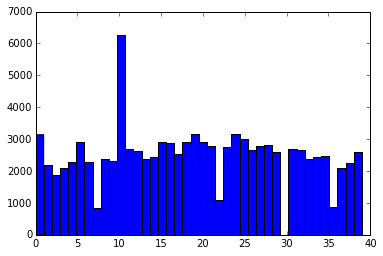

In [86]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.hist([board.index(name) for name in results], bins=40);

In [87]:
ProbDist(Counter(results))

{'A1': 0.02177,
 'A2': 0.02086,
 'B1': 0.02279,
 'B2': 0.02374,
 'B3': 0.02307,
 'C1': 0.02684,
 'C2': 0.02381,
 'C3': 0.02454,
 'CC1': 0.01891,
 'CC2': 0.02525,
 'CC3': 0.02387,
 'CH1': 0.00845,
 'CH2': 0.01083,
 'CH3': 0.00861,
 'D1': 0.02891,
 'D2': 0.02908,
 'D3': 0.03152,
 'E1': 0.02784,
 'E2': 0.02746,
 'E3': 0.03156,
 'F1': 0.02647,
 'F2': 0.0279,
 'F3': 0.02609,
 'FP': 0.02915,
 'G1': 0.02679,
 'G2': 0.02666,
 'G3': 0.0243,
 'GO': 0.03139,
 'H1': 0.0208,
 'H2': 0.02597,
 'JAIL': 0.06252,
 'R1': 0.02904,
 'R2': 0.02903,
 'R3': 0.02996,
 'R4': 0.02482,
 'T1': 0.02278,
 'T2': 0.02239,
 'U1': 0.02614,
 'U2': 0.02809}

We can see that `JAIL` is by far the most popular square (at a little over 6%), and that the three least popular squares (around 1%) are the three chance squares, `CH1`, `CH2`, and `CH3` (because 10 of the 16 chance cards send the player away from the square), and of course the "Go to Jail" square, square number 30 on the plot, which has a count of 0 because you can't end a turn there. The other squares are pretty evenly distributed at 2% to 3% each.

# Classy Monopoly

Some people might think that the "`global here`" is bad style. One way to eliminate global variables is to pack them up into objects.  We can do that by making a `Monopoly` class.  My personal preference would be that the "`global here`" declarations add less visual clutter than the 32 instances of "`self.`" needed for the class definition, but I present this refactored version for those who prefer it.

In [88]:
class Monopoly(object):

    def __init__(self):
        "Initialize the Monopoly game."
        self.board = split("""GO   A1 CC1 A2  T1 R1 B1  CH1 B2 B3
                              JAIL C1 U1  C2  C3 R2 D1  CC2 D2 D3 
                              FP   E1 CH2 E2  E3 R3 F1  F2  U2 F3 
                              G2J  G1 G2  CC3 G3 R4 CH3 H1  T2 H2""")
        self.CC = Deck(shuffle(split('GO JAIL' + 14 * ' ?')))
        self.CH = Deck(shuffle(split('GO JAIL C1 E3 H2 R1 R R U -3' + 6 * ' ?')))
        self.here = 0
        self.counter = Counter()
        
    def simulate(self, steps):
        """Simulate given number of steps of monopoly game, incrementing counter 
        for current square after each step. Return a list of (square, count) pairs in order."""
        doubles = 0
        for _ in range(steps):
            d1, d2 = random.randint(1, 6), random.randint(1, 6)
            self.goto(self.here + d1 + d2)
            doubles = (doubles + 1) if (d1 == d2) else 0
            if doubles == 3 or self.board[self.here] == 'G2J':  
                self.goto('JAIL')
            elif self.board[self.here].startswith('CC'):
                self.do_card(self.CC)
            elif self.board[self.here].startswith('CH'):
                self.do_card(self.CH)
            self.counter[self.board[self.here]] += 1
        return ProbDist(self.counter)

    def goto(self, square):
        "Go to destination square, which can be either a square number or a square name."
        if isinstance(square, int):
            self.here = square % len(self.board)
        else:
            self.here = self.board.index(square)

    def do_card(self, deck):
        "Take the top card from deck and do what it says."
        card = deck[0]                   # Top card from deck
        deck.rotate(1)                   # Move top card to bottom of deck
        if card == 'R' or card == 'U': 
            while not self.board[self.here].startswith(card):
                self.goto(self.here + 1) # Advance to next railroad or utility
        elif card == '-3':
            self.goto(self.here - 3)     # Go back 3 spaces
        elif card != '?':
            self.goto(card)              # Go to a destination
        
split = str.split

results = list(monopoly(10 ** 5))
Monopoly().simulate(10 ** 5)

{'A1': 0.02097,
 'A2': 0.02121,
 'B1': 0.02337,
 'B2': 0.02332,
 'B3': 0.02342,
 'C1': 0.02715,
 'C2': 0.02364,
 'C3': 0.02417,
 'CC1': 0.01921,
 'CC2': 0.02549,
 'CC3': 0.02472,
 'CH1': 0.0083,
 'CH2': 0.01076,
 'CH3': 0.00886,
 'D1': 0.02815,
 'D2': 0.02934,
 'D3': 0.03091,
 'E1': 0.02762,
 'E2': 0.02634,
 'E3': 0.03149,
 'F1': 0.02743,
 'F2': 0.02673,
 'F3': 0.0262,
 'FP': 0.028,
 'G1': 0.02612,
 'G2': 0.0263,
 'G3': 0.02493,
 'GO': 0.03086,
 'H1': 0.02155,
 'H2': 0.02694,
 'JAIL': 0.06101,
 'R1': 0.0301,
 'R2': 0.02961,
 'R3': 0.03102,
 'R4': 0.02495,
 'T1': 0.02363,
 'T2': 0.021,
 'U1': 0.02646,
 'U2': 0.02872}

# The St. Petersburg Paradox

One more famous paradox:  The [St. Petersburg paradox](https://en.wikipedia.org/wiki/St._Petersburg_paradox) from 1713, named for the home town of the [Bernoullis](http://www.storyofmathematics.com/18th_bernoulli.html), and introduced by [Daniel Bernoulli](), the nephew of Jacob Bernoulli (the urn guy).

> *A casino offers a game of chance for a single player in which a fair coin is tossed at each stage. The pot starts at 2 dollars and is doubled every time a head appears. The first time a tail appears, the game ends and the player wins whatever is in the pot. Thus the player wins 2 dollars if a tail appears on the first toss, 4 dollars if a head appears on the first toss and a tail on the second, etc. What is the expected value of this game to the player?*

To calculate the expected value, we see there is a 1/2 chance of a tail on the first toss (yielding a pot of \$2) and if not that, a 1/2 &times; 1/2 = 1/4 chance of a tail on the second toss (yielding a pot of \$4), and so on. So in total, the expected value is:

$$\frac{1}{2}\cdot 2 + \frac{1}{4}\cdot 4 + \frac{1}{8}\cdot 8 + \frac{1}{16} \cdot 16 + \cdots = 1 + 1 + 1 + 1 + \cdots = \infty$$

The expected value is infinite! But anyone playing the game would not expect to win an infinite amount; thus the paradox.

## Response 1: Limited Resources

The first major response to the paradox is that the casino's resources are limited. Once you break their bank, they can't pay out any more, and thus the expected return is finite. Let's consider the case where the bank has a limit to their resources, and create a probability distribution for the problem. We keep doubling the pot and halving the probability of winning the amount in the pot (half because you get the pot on a tail but not a head), until we reach the limit.

In [89]:
def st_pete(limit):
    "Return the probability distribution for the St. Petersburg Paradox with a limited bank."
    P = {}     # The probability distribution
    pot = 2    # Amount of money in the pot
    pr  = 1/2. # Probability that you end up with the amount in pot
    while pot < limit:
        P[pot] = pr
        pot, pr = pot * 2, pr / 2.
    P[limit] = pr * 2               # pr * 2 because you get limit for heads or tails
    assert sum(P.values()) == 1.0
    return P

Let's try with the casino limited to 100 million dollars:

In [90]:
StP = st_pete(limit=10**8)
StP

{2: 0.5,
 4: 0.25,
 8: 0.125,
 16: 0.0625,
 32: 0.03125,
 64: 0.015625,
 128: 0.0078125,
 256: 0.00390625,
 512: 0.001953125,
 1024: 0.0009765625,
 2048: 0.00048828125,
 4096: 0.000244140625,
 8192: 0.0001220703125,
 16384: 6.103515625e-05,
 32768: 3.0517578125e-05,
 65536: 1.52587890625e-05,
 131072: 7.62939453125e-06,
 262144: 3.814697265625e-06,
 524288: 1.9073486328125e-06,
 1048576: 9.5367431640625e-07,
 2097152: 4.76837158203125e-07,
 4194304: 2.384185791015625e-07,
 8388608: 1.1920928955078125e-07,
 16777216: 5.960464477539063e-08,
 33554432: 2.9802322387695312e-08,
 67108864: 1.4901161193847656e-08,
 100000000: 1.4901161193847656e-08}

Now we define the function `EV` to compute the [expected value](https://en.wikipedia.org/wiki/Expected_value) of a probability distribution: 

In [91]:
def EV(P):
    "The expected value of a probability distribution."
    return sum(P[v] * v 
               for v in P)

In [92]:
EV(StP)

27.490116119384766

This says that for a casino with a bankroll of 100 million dollars, if you want to maximize your expected value, you should be willing to pay up to \$27.49 to play the game. Would you pay that much? I wouldn't, and neither would Daniel Bernoulli. 

## Response 2: Value of Money

Daniel Bernoulli came up with a second response to the paradox based on the idea that if you have a lot of money, then additional money becomes less valuable to you. If I had nothing, and I won \$1000, I would be very happy. But if I already had a million dollars and I won \$1000, it would be less valuable. How much less valuable? Bernoulli proposed, and [experiments confirm](https://books.google.com/books?id=1oEa-BiARWUC&pg=PA205&lpg=PA205&dq=mr+beard+oil+wildcatter+value+of+money+utility&source=bl&ots=cBDIX-rkTz&sig=GHB8-inorWrU39vA8JYV_sCtqB8&hl=en&sa=X&ved=0CCAQ6AEwAGoVChMI5fu-p8qlyAIViKWICh0XAAz5#v=onepage&q=mr%20beard%20oil%20wildcatter%20value%20of%20money%20utility&f=false), that *the value of money is roughly logarithmic.* That is, rational bettors don't try to maximize their expected monetary value, they try to maximize their *expected utility*: the amount of "happiness" that the money is worth.
I'll write the function `util` to describe what a dollar amount is worth to a hypothetical gambler. `util` says that a dollar is worth a dollar, until the amount is "enough" money. After that point, each additional dollar is worth half as much (only brings half as much happiness). Value keeps accumulating at this rate until we reach the next threshold of "enough," when the utility of additional dollars is halfed again. The exact details of `util` are not critical; what matters is that overall money becomes less valuable after we have won a lot of it.

In [93]:
def util(dollars, enough=1000): 
    "The value of money: only half as valuable after you already have enough."
    if dollars < enough:
        return dollars
    else:
        return enough + util((dollars-enough)/2., enough*2)

A table and a plot will give a feel for the `util` function. Notice the characterisitc concave-down shape of the plot.

In [94]:
for d in range(2, 10):
    m = 10 ** d
    print('{:15,d} $ = {:10,d} util'.format(m, int(util(m))))

            100 $ =        100 util
          1,000 $ =      1,000 util
         10,000 $ =      4,250 util
        100,000 $ =     15,937 util
      1,000,000 $ =     51,593 util
     10,000,000 $ =    162,460 util
    100,000,000 $ =    535,646 util
  1,000,000,000 $ =  1,658,229 util


Y axis is util(x); x axis is in thousands of dollars.


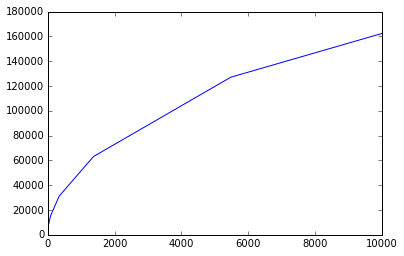

In [95]:
plt.plot([util(x) for x in range(1000, 10000000, 1000)])
print('Y axis is util(x); x axis is in thousands of dollars.')

Now I will define the function `EU`, which computes the [expected utility](http://wiki.lesswrong.com/wiki/Expected_utility) of the game:

In [96]:
def EU(P, U):
    "The expected utility of a probability distribution, given a utility function."
    return sum(P[e] * U(e) 
               for e in P)

In [97]:
EU(StP, util)

13.096907431492582

That says we should pay up to \$13.10 to play the game, which sounds more reasonable than \$27.49.

# Understanding St. Petersburg  through Simulation

Before I plunk down my \$13, I'd like to understand the game better. I'll write a simulation of the game:

In [98]:
def flip(): return random.choice(('head', 'tail'))

def simulate_st_pete(limit=10**9):
    "Simulate one round of the St. Petersburg game, and return the payoff."
    pot = 2
    while flip() == 'head':
        pot = pot * 2
        if pot > limit:
            return limit
    return pot

I will run the simulation 100,000 times (with a random seed specified for reproducability) and make the results into a probability distribution:

In [99]:
random.seed(123456)

results = ProbDist(Counter(simulate_st_pete() for _ in range(100000)))
results

{2: 0.49755,
 4: 0.2506,
 8: 0.1259,
 16: 0.06322,
 32: 0.03151,
 64: 0.01607,
 128: 0.00751,
 256: 0.0037,
 512: 0.00191,
 1024: 0.00106,
 2048: 0.00045,
 4096: 0.00029,
 8192: 0.0001,
 16384: 6e-05,
 32768: 5e-05,
 65536: 1e-05,
 1048576: 1e-05}

The results are about what you would expect: about half the pots are 2, a quarter are 4, and higher pots are more and more unlikely.  Let's check expected utility and expected value:

In [100]:
EU(results, util), EV(results)

(13.2477575, 26.71606)

These are not too far off from the theoretial values.

To see better how things unfold, I will define a function to plot the running average of repeated rounds:

In [101]:
def running_averages(iterable):
    "For each element in the iterable, yield the mean of all elements seen so far." 
    total, n = 0, 0
    for x in iterable:
        total, n = total + x, n + 1
        yield total / n

def plot_running_averages(fn, n):
    "Plot the running average of calling the function n times."
    plt.plot(list(running_averages(fn() for _ in range(n))))

Let's do ten repetitions of plotting 100,000 rounds each repetition:

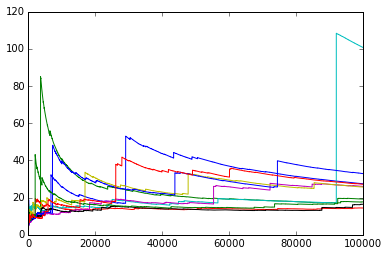

In [102]:
random.seed('running')

for i in range(10):
    plot_running_averages(simulate_st_pete, 100000);

What can we see from this?  Nine of the 10 repetitions have a final expected value payoff (after 100,000 rounds) between 10 and 35. So a price around \$13 still seems reasonable. One outlier has an average payoff just over 100, so if you are feeling lucky you might be willing to pay more than \$13.

# Conclusion

We've seen how to manage probability paradoxes. And we've seen how to handle tricky non-paradoxical problems as well. Just be explicit about what the problem says, and then methodical about defining the sample space, and finally be careful in counting the number of outcomes in the numerator and denominator. Easy as 1-2-3. But the bigger lesson is: treat those around you as reasonable people, and when they have different opinions, try to discover what problem they are  solving.

*Note*: Here is a very nice [translation of this page to Julia](http://nbviewer.ipython.org/gist/mbeltagy/3ba5f77da6382da192c3) by 
Mohammed El-Beltagy.